# Setas para Ronald

![setas en el bosque](data/setas_ilustracion.jpg)

Lo primero de todo, cargamos todas las librerías necesarias. 

In [145]:
import pandas as pd
import numpy as np

import sys
import os
import re

import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, LabelBinarizer, MultiLabelBinarizer, OneHotEncoder 

In [3]:
import snappy
print(snappy.__version__)

0.7.3


In [5]:
# contenido = snappy.decompress(open("data/train.snappy", "rb").read()) if os.path.exists("data/train.snappy") else "Archivo no encontrado"

In [6]:
pd.read_parquet('data/train.snappy')

,descripcion
0,**La observación** 367 describe una seta de *...
1,**La observación** 5123 describe una seta de ...
2,**La observación** 2864 describe una seta de ...
3,**La observación** 4674 describe una seta de ...
4,**La observación** 1210 describe una seta de ...
...,...
4598,**La observación** 1028 describe una seta de ...
4599,**La observación** 5591 describe una seta de ...
4600,**La observación** 2053 describe una seta de ...
4601,**La observación** 4604 describe una seta de ...


In [ ]:
pd.set_option('display.max_colwidth', None)
pd.read_parquet('data/train.snappy').iloc[5:9]

In [ ]:
pd.read_parquet('data/train.snappy').iloc[0]

In [9]:
datos = pd.read_parquet('data/train.snappy')

In [99]:
#voy a ir alimentando la función con filas de prueba para ver si toma bien los valores
fila= datos.iloc[0:3]
fila

,descripcion
0,"**La observación** 367 describe una seta de **clase** edible. Tiene una **forma de sombrero** bell con una **superficie** scaly **y un color** yellow. **Presenta** moretones y tiene un **olor** almond. **Las branquias son de tipo** free con una **separación** close **y un tamaño** broad. **El color de las branquias es** black. **La forma del tallo** es enlarging y la **raíz del tallo** es club. **La superficie del tallo por encima del anillo** es smooth **y por debajo del anillo** es smooth. El **color del tallo por encima del anillo** es white **y por debajo del anillo** es white. **El tipo de velo** es partial con un **color de velo** white. Tiene one **anillo(s)**, **de tipo** pendant **y el color de la impresión de esporas** es brown. Se encuentra en una **población** scattered y su **hábitat es** grasses."
1,"**La observación** 5123 describe una seta de **clase** poisonous. Tiene una **forma de sombrero** convex con una **superficie** smooth **y un color** red. **No presenta** moretones y tiene un **olor** foul. **Las branquias son de tipo** free con una **separación** close **y un tamaño** narrow. **El color de las branquias es** buff. **La forma del tallo** es tapering y la **raíz del tallo** es ?. **La superficie del tallo por encima del anillo** es silky **y por debajo del anillo** es silky. El **color del tallo por encima del anillo** es white **y por debajo del anillo** es pink. **El tipo de velo** es partial con un **color de velo** white. Tiene one **anillo(s)**, **de tipo** evanescent **y el color de la impresión de esporas** es white. Se encuentra en una **población** several y su **hábitat es** paths."
2,"**La observación** 2864 describe una seta de **clase** edible. Tiene una **forma de sombrero** convex con una **superficie** fibrous **y un color** green. **Presenta** moretones y tiene un **olor** null. **Las branquias son de tipo** free con una **separación** close **y un tamaño** broad. **El color de las branquias es** pink. **La forma del tallo** es tapering y la **raíz del tallo** es bulbous. **La superficie del tallo por encima del anillo** es smooth **y por debajo del anillo** es smooth. El **color del tallo por encima del anillo** es pink **y por debajo del anillo** es white. **El tipo de velo** es partial con un **color de velo** white. Tiene one **anillo(s)**, **de tipo** pendant **y el color de la impresión de esporas** es brown. Se encuentra en una **población** several y su **hábitat es** wood."


In [11]:
type(fila)

pandas.core.series.Series

In [131]:
#prueba extracción Regex de filas de prueba (ayuda Gemini)
import re

#fila_n = "**La observación** 367 describe una seta de **clase** edible. Tiene una **forma de sombrero** bell con una **superficie** scaly **y un color** yellow. **Presenta** moretones y tiene un **olor** almond. **Las branquias son de tipo** free con una **separación** close **y un tamaño** broad. **El color de las branquias es** black. **La forma del tallo** es enlarging y la **raíz del tallo** es club. **La superficie del tallo por encima del anillo** es smooth y **por debajo del anillo** es smooth. El **color del tallo por encima del anillo** es white y **por debajo del anillo** es white. **El tipo de velo** es partial con un **color de velo** white. Tiene one **anillo(s)**, **de tipo** pendant y **el color de la impresión de esporas** es brown. Se encuentra en una **población** scattered y su **hábitat es** grasses."

fila_n = datos['descripcion'].iloc[3]

diccionario_fila_n = {
    'ID': re.search(r'\*\*La observación\*\*(.*?) describe', fila_n).group(1).strip() if re.search(r'\*\*La observación\*\*(.*?) describe', fila_n) else None,
    'clase': re.search(r'\*\*clase\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*clase\*\*(.*?)\.', fila_n) else None,
    'forma_sombrero': re.search(r'\*\*forma de sombrero\*\* (.*?) ', fila_n).group(1).strip() if re.search(r'\*\*forma de sombrero\*\* (.*?) ', fila_n) else None,
    'superficie': re.search(r'\*\*superficie\*\*(.*?) \*\*y', fila_n).group(1).strip() if re.search(r'\*\*superficie\*\*(.*?) \*\*y', fila_n) else None,
    'color': re.search(r'\*\*y un color\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*y un color\*\*(.*?)\.', fila_n) else None,
   
    'moretones': re.search(r'\*\*Presenta\*\*(.*?) y', fila_n).group(1).strip() if re.search(r'\*\*Presenta\*\*(.*?) y', fila_n) else None,
   
    'olor': re.search(r'\*\*olor\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*olor\*\*(.*?)\.', fila_n) else None,
    'tipo_branquias': re.search(r'\*\*Las branquias son de tipo\*\*(.*?) con', fila_n).group(1).strip() if re.search(r'\*\*Las branquias son de tipo\*\*(.*?) con', fila_n) else None,
    'separacion_branquias': re.search(r'\*\*separación\*\*(.*?) \*\*y', fila_n).group(1).strip() if re.search(r'\*\*separación\*\*(.*?) \*\*y', fila_n) else None,
    'tamano_branquias': re.search(r'\*\*y un tamaño\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*y un tamaño\*\*(.*?)\.', fila_n) else None,
    'color_branquias': re.search(r'\*\*El color de las branquias es\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*El color de las branquias es\*\*(.*?)\.', fila_n) else None,
    'forma_tallo': re.search(r'\*\*La forma del tallo\*\* (?:es) (.*?) y', fila_n).group(1).strip() if re.search(r'\*\*La forma del tallo\*\* (?:es) (.*?) y', fila_n) else None,
    'raiz_tallo': re.search(r'\*\*raíz del tallo\*\* (?:es) (.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*raíz del tallo\*\* (?:es) (.*?)\.', fila_n) else None,
    'superficie_tallo_arriba': re.search(r'\*\*La superficie del tallo por encima del anillo\*\* (?:es) (.*?) ', fila_n).group(1).strip() if re.search(r'\*\*La superficie del tallo por encima del anillo\*\* (?:es) (.*?) ', fila_n) else None,
    'superficie_tallo_abajo': re.search(r'\*\*y por debajo del anillo\*\* (?:es) (.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*y por debajo del anillo\*\* (?:es) (.*?)\.', fila_n) else None,
    'color_tallo_arriba': re.search(r'\*\*color del tallo por encima del anillo\*\* (?:es) (.*?) ', fila_n).group(1).strip() if re.search(r'\*\*color del tallo por encima del anillo\*\* (?:es) (.*?) ', fila_n) else None,
   
    'color_tallo_abajo': re.findall(r'\*\*y por debajo del anillo\*\* (?:es) (.*?)\.', fila_n)[1] if re.findall(r'\*\*y por debajo del anillo\*\* (?:es) (.*?)\.', fila_n)[1] else None,
    
    'tipo_velo': re.search(r'\*\*El tipo de velo\*\* (?:es) (.*?) con', fila_n).group(1).strip() if re.search(r'\*\*El tipo de velo\*\* (?:es) (.*?) con', fila_n) else None,
    'color_velo': re.search(r'\*\*color de velo\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*color de velo\*\*(.*?)\.', fila_n) else None,
    
    'anillo': re.search(r'\.?\s*Tiene ([^.]*?) \*\*anillo\(s\)\*\*', fila_n).group(1).strip() if re.search(r'\.?\s*Tiene ([^.]*?) \*\*anillo\(s\)\*\*', fila_n) else None,
    'tipo_anillo': re.search(r'\*\*de tipo\*\* (.*?) ', fila_n).group(1).strip() if re.search(r'\*\*de tipo\*\* (.*?) ', fila_n) else None,
    'color_impresion_esporas': re.search(r'\*\*y el color de la impresión de esporas\*\* (?:es) (.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*y el color de la impresión de esporas\*\* (?:es)(.*?)\.', fila_n) else None,
    'poblacion': re.search(r'\*\*población\*\*(.*?) y', fila_n).group(1).strip() if re.search(r'\*\*población\*\*(.*?) y', fila_n) else None,
    'habitat': re.search(r'\*\*hábitat es\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*hábitat es\*\*(.*?)\.', fila_n) else None
}

print(diccionario_fila_n)

{'ID': '4674', 'clase': 'poisonous', 'forma_sombrero': 'flat', 'superficie': 'smooth', 'color': 'white', 'moretones': 'moretones', 'olor': 'foul', 'tipo_branquias': 'free', 'separacion_branquias': 'close', 'tamano_branquias': 'broad', 'color_branquias': 'pink', 'forma_tallo': 'tapering', 'raiz_tallo': 'bulbous', 'superficie_tallo_arriba': 'fibrous', 'superficie_tallo_abajo': 'fibrous', 'color_tallo_arriba': 'white', 'color_tallo_abajo': 'white', 'tipo_velo': 'partial', 'color_velo': 'white', 'anillo': 'one', 'tipo_anillo': 'pendant', 'color_impresion_esporas': 'chocolate', 'poblacion': 'scattered', 'habitat': 'grasses'}


In [92]:
fila

,descripcion
0,"**La observación** 367 describe una seta de **clase** edible. Tiene una **forma de sombrero** bell con una **superficie** scaly **y un color** yellow. **Presenta** moretones y tiene un **olor** almond. **Las branquias son de tipo** free con una **separación** close **y un tamaño** broad. **El color de las branquias es** black. **La forma del tallo** es enlarging y la **raíz del tallo** es club. **La superficie del tallo por encima del anillo** es smooth **y por debajo del anillo** es smooth. El **color del tallo por encima del anillo** es white **y por debajo del anillo** es white. **El tipo de velo** es partial con un **color de velo** white. Tiene one **anillo(s)**, **de tipo** pendant **y el color de la impresión de esporas** es brown. Se encuentra en una **población** scattered y su **hábitat es** grasses."
1,"**La observación** 5123 describe una seta de **clase** poisonous. Tiene una **forma de sombrero** convex con una **superficie** smooth **y un color** red. **No presenta** moretones y tiene un **olor** foul. **Las branquias son de tipo** free con una **separación** close **y un tamaño** narrow. **El color de las branquias es** buff. **La forma del tallo** es tapering y la **raíz del tallo** es ?. **La superficie del tallo por encima del anillo** es silky **y por debajo del anillo** es silky. El **color del tallo por encima del anillo** es white **y por debajo del anillo** es pink. **El tipo de velo** es partial con un **color de velo** white. Tiene one **anillo(s)**, **de tipo** evanescent **y el color de la impresión de esporas** es white. Se encuentra en una **población** several y su **hábitat es** paths."


In [46]:
re.findall(r'\*\*y por debajo del anillo\*\* (?:es) (.*?)\.', fila_n)[1]

'white'

In [85]:
re.search(r'(?:^|\. )Tiene (.*?) \*\*anillo\(s\)\*\*,', fila_n)

In [64]:
re.search(r'\*\*clase\*\*(.*?)\. Tiene', fila_n)

Ahora construyo dicho diccionario para todas las filas u observaciones, recorriendo mis datos con una función.

In [ ]:

def extraer_atributos(fila_n):
    """Extrae los atributos de una fila de descripción usando regex."""
    
    return {
    'ID': re.search(r'\*\*La observación\*\*(.*?) describe', fila_n).group(1).strip() if re.search(r'\*\*La observación\*\*(.*?) describe', fila_n) else None,
    'clase': re.search(r'\*\*clase\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*clase\*\*(.*?)\.', fila_n) else None,
    'forma_sombrero': re.search(r'\*\*forma de sombrero\*\* (.*?) ', fila_n).group(1).strip() if re.search(r'\*\*forma de sombrero\*\* (.*?) ', fila_n) else None,
    'superficie': re.search(r'\*\*superficie\*\*(.*?) \*\*y', fila_n).group(1).strip() if re.search(r'\*\*superficie\*\*(.*?) \*\*y', fila_n) else None,
    'color': re.search(r'\*\*y un color\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*y un color\*\*(.*?)\.', fila_n) else None,
    'moretones': re.search(r'\*\*Presenta\*\*(.*?) y', fila_n).group(1).strip() if re.search(r'\*\*Presenta\*\*(.*?) y', fila_n) else None,
    'olor': re.search(r'\*\*olor\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*olor\*\*(.*?)\.', fila_n) else None,
    'tipo_branquias': re.search(r'\*\*Las branquias son de tipo\*\*(.*?) con', fila_n).group(1).strip() if re.search(r'\*\*Las branquias son de tipo\*\*(.*?) con', fila_n) else None,
    'separacion_branquias': re.search(r'\*\*separación\*\*(.*?) \*\*y', fila_n).group(1).strip() if re.search(r'\*\*separación\*\*(.*?) \*\*y', fila_n) else None,
    'tamano_branquias': re.search(r'\*\*y un tamaño\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*y un tamaño\*\*(.*?)\.', fila_n) else None,
    'color_branquias': re.search(r'\*\*El color de las branquias es\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*El color de las branquias es\*\*(.*?)\.', fila_n) else None,
    'forma_tallo': re.search(r'\*\*La forma del tallo\*\* (?:es) (.*?) y', fila_n).group(1).strip() if re.search(r'\*\*La forma del tallo\*\* (?:es) (.*?) y', fila_n) else None,
    'raiz_tallo': re.search(r'\*\*raíz del tallo\*\* (?:es) (.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*raíz del tallo\*\* (?:es) (.*?)\.', fila_n) else None,
    'superficie_tallo_arriba': re.search(r'\*\*La superficie del tallo por encima del anillo\*\* (?:es) (.*?) ', fila_n).group(1).strip() if re.search(r'\*\*La superficie del tallo por encima del anillo\*\* (?:es) (.*?) ', fila_n) else None,
    'superficie_tallo_abajo': re.search(r'\*\*y por debajo del anillo\*\* (?:es) (.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*y por debajo del anillo\*\* (?:es) (.*?)\.', fila_n) else None,
    'color_tallo_arriba': re.search(r'\*\*color del tallo por encima del anillo\*\* (?:es) (.*?) ', fila_n).group(1).strip() if re.search(r'\*\*color del tallo por encima del anillo\*\* (?:es) (.*?) ', fila_n) else None,
    'color_tallo_abajo': re.findall(r'\*\*y por debajo del anillo\*\* (?:es) (.*?)\.', fila_n)[1] if re.findall(r'\*\*y por debajo del anillo\*\* (?:es) (.*?)\.', fila_n)[1] else None,
    'tipo_velo': re.search(r'\*\*El tipo de velo\*\* (?:es) (.*?) con', fila_n).group(1).strip() if re.search(r'\*\*El tipo de velo\*\* (?:es) (.*?) con', fila_n) else None,
    'color_velo': re.search(r'\*\*color de velo\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*color de velo\*\*(.*?)\.', fila_n) else None,
    'anillo': re.search(r'\.?\s*Tiene ([^.]*?) \*\*anillo\(s\)\*\*', fila_n).group(1).strip() if re.search(r'\.?\s*Tiene ([^.]*?) \*\*anillo\(s\)\*\*', fila_n) else None,
    'tipo_anillo': re.search(r'\*\*de tipo\*\* (.*?) ', fila_n).group(1).strip() if re.search(r'\*\*de tipo\*\* (.*?) ', fila_n) else None,
    'color_impresion_esporas': re.search(r'\*\*y el color de la impresión de esporas\*\* (?:es) (.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*y el color de la impresión de esporas\*\* (?:es)(.*?)\.', fila_n) else None,
    'poblacion': re.search(r'\*\*población\*\*(.*?) y', fila_n).group(1).strip() if re.search(r'\*\*población\*\*(.*?) y', fila_n) else None,
    'habitat': re.search(r'\*\*hábitat es\*\*(.*?)\.', fila_n).group(1).strip() if re.search(r'\*\*hábitat es\*\*(.*?)\.', fila_n) else None
}


# Aplicar la función a todas las filas
datos_extraidos = datos['descripcion'].apply(extraer_atributos)



In [133]:
datos_extraidos

0                {'ID': '367', 'clase': 'edible', 'forma_sombrero': 'bell', 'superficie': 'scaly', 'color': 'yellow', 'moretones': 'moretones', 'olor': 'almond', 'tipo_branquias': 'free', 'separacion_branquias': 'close', 'tamano_branquias': 'broad', 'color_branquias': 'black', 'forma_tallo': 'enlarging', 'raiz_tallo': 'club', 'superficie_tallo_arriba': 'smooth', 'superficie_tallo_abajo': 'smooth', 'color_tallo_arriba': 'white', 'color_tallo_abajo': 'white', 'tipo_velo': 'partial', 'color_velo': 'white', 'anillo': 'one', 'tipo_anillo': 'pendant', 'color_impresion_esporas': 'brown', 'poblacion': 'scattered', 'habitat': 'grasses'}
1                             {'ID': '5123', 'clase': 'poisonous', 'forma_sombrero': 'convex', 'superficie': 'smooth', 'color': 'red', 'moretones': None, 'olor': 'foul', 'tipo_branquias': 'free', 'separacion_branquias': 'close', 'tamano_branquias': 'narrow', 'color_branquias': 'buff', 'forma_tallo': 'tapering', 'raiz_tallo': '?', 'superficie_tallo_arriba': 'silk

In [134]:
# Convertir a DataFrame
df_0 = pd.DataFrame(datos_extraidos.tolist()).set_index('ID')


df_0.head(10)

,clase,forma_sombrero,superficie,color,moretones,olor,tipo_branquias,separacion_branquias,tamano_branquias,color_branquias,...,superficie_tallo_abajo,color_tallo_arriba,color_tallo_abajo,tipo_velo,color_velo,anillo,tipo_anillo,color_impresion_esporas,poblacion,habitat
ID,,,,,,,,,,,,,,,,,,,,,
367,edible,bell,scaly,yellow,moretones,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,scattered,grasses
5123,poisonous,convex,smooth,red,None,foul,free,close,narrow,buff,...,silky,white,pink,partial,white,one,evanescent,white,several,paths
2864,edible,convex,fibrous,green,moretones,null,free,close,broad,pink,...,smooth,pink,white,partial,white,one,pendant,brown,several,wood
4674,poisonous,flat,smooth,white,moretones,foul,free,close,broad,pink,...,fibrous,white,white,partial,white,one,pendant,chocolate,scattered,grasses
1210,edible,convex,smooth,white,None,null,free,crowded,broad,black,...,fibrous,white,white,partial,white,one,evanescent,black,abundant,grasses
5381,poisonous,flat,smooth,red,None,spicy,free,close,narrow,buff,...,silky,pink,white,partial,white,one,evanescent,white,several,leaves
4001,poisonous,convex,smooth,green,None,creosote,free,close,narrow,pink,...,smooth,white,white,partial,white,one,pendant,black,several,wood
5168,poisonous,convex,scaly,red,None,spicy,free,close,narrow,buff,...,silky,white,white,partial,white,one,evanescent,white,several,paths
14,edible,sunken,fibrous,green,None,null,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,brown,solitary,urban


In [135]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4603 entries, 367 to 4790
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   clase                    4603 non-null   object
 1   forma_sombrero           4603 non-null   object
 2   superficie               4603 non-null   object
 3   color                    4603 non-null   object
 4   moretones                2170 non-null   object
 5   olor                     4603 non-null   object
 6   tipo_branquias           4603 non-null   object
 7   separacion_branquias     4603 non-null   object
 8   tamano_branquias         4603 non-null   object
 9   color_branquias          4603 non-null   object
 10  forma_tallo              4603 non-null   object
 11  raiz_tallo               4603 non-null   object
 12  superficie_tallo_arriba  4603 non-null   object
 13  superficie_tallo_abajo   4603 non-null   object
 14  color_tallo_arriba       4603 non-null   ob

In [136]:
print(df_0.isnull().sum())

clase                         0
forma_sombrero                0
superficie                    0
color                         0
moretones                  2433
olor                          0
tipo_branquias                0
separacion_branquias          0
tamano_branquias              0
color_branquias               0
forma_tallo                   0
raiz_tallo                    0
superficie_tallo_arriba       0
superficie_tallo_abajo        0
color_tallo_arriba            0
color_tallo_abajo             0
tipo_velo                     0
color_velo                    0
anillo                        0
tipo_anillo                   0
color_impresion_esporas       0
poblacion                     0
habitat                       0
dtype: int64


Ya observo problemas con la columna 'moretones'. Donde aparezca 'None', entendemos que no presenta moretones.

In [137]:
df_0['moretones'].unique()

array(['moretones', None], dtype=object)

In [141]:
df_0['anillo'].unique()

array(['one', 'two', 'null'], dtype=object)

Observo que 'clase' solo existe comestible o venenosa.

In [138]:
df_0['clase'].unique()

array(['edible', 'poisonous'], dtype=object)

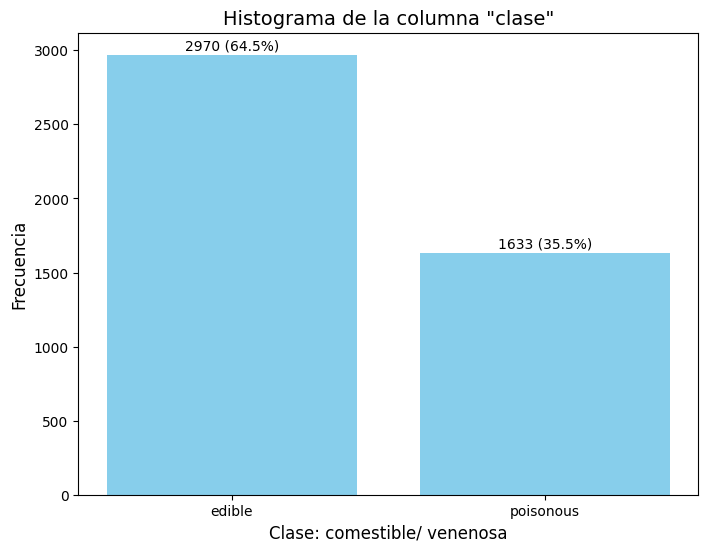

In [139]:
import matplotlib.pyplot as plt

# Contamos la frecuencia de los valores en la columna 'clase'
frecuencia_clase = df_resultado['clase'].value_counts()

# Calculamos el porcentaje de cada clase con respecto al total
porcentaje_clase = (frecuencia_clase / len(df_resultado)) * 100

# Crear el histograma
plt.figure(figsize=(8, 6))
bars = plt.bar(frecuencia_clase.index, frecuencia_clase.values, color='skyblue')

# Agregar títulos y etiquetas
plt.title('Histograma de la columna "clase"', fontsize=14)
plt.xlabel('Clase: comestible/ venenosa', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Agregar el número total y porcentaje dentro de cada barra
for bar, count, percentage in zip(bars, frecuencia_clase.values, porcentaje_clase):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, 
             f'{count} ({percentage:.1f}%)', ha='center', va='bottom', fontsize=10)

# Mostrar la gráfica
plt.show()


- Se trata de un problema de clasificación binaria.
- Vamos a trabajar con modelos supervisados, dado que conocemos la target a predecir, pero nos apoyaremos antes en modelos no-supervisados para clusterizar grupos con características similares, que nos puedan ayudar. 
- Observo un desbalance importante en la target a predecir, lo cual habremos de considerar y cuidar.

Voy a convertir todos mis valores a numéricos

In [147]:
# función conversión a numerícos (ayuda Claude)
def convert_to_numeric(df):
    """
    Convierte todas las columnas categóricas a numéricas usando MultiLabelBinarizer
    
    Args:
        df: DataFrame original con columnas tipo 'object'
    
    Returns:
        DataFrame con todas las columnas convertidas a numéricas
    """
    # Crear una copia del DataFrame
    df_numeric = df_0.copy()
    
    # Para cada columna en el DataFrame
    for column in df_numeric.columns:
        # Convertir cada valor a una lista para MultiLabelBinarizer
        values = [[val] for val in df_numeric[column]]
        
        # Crear y ajustar el MultiLabelBinarizer
        mlb = MultiLabelBinarizer()
        # Transformar la columna
        encoded = mlb.fit_transform(values)
        
        # Crear nombres para las nuevas columnas
        new_columns = [f"{column}_{class_name}" for class_name in mlb.classes_]
        
        # Convertir a DataFrame
        encoded_df = pd.DataFrame(encoded, columns=new_columns, index=df.index)
        
        # Eliminar la columna original y añadir las nuevas
        df_numeric = df_numeric.drop(column, axis=1)
        df_numeric = pd.concat([df_numeric, encoded_df], axis=1)
    
    return df_numeric

# Ejemplo de uso:
# df_numeric = convert_to_numeric(df)